In [1]:
import pandas as pd
import seaborn as sns

In [2]:
planets = pd.read_csv('planets.csv')

In [3]:
planets

,Planet name,Distance (AU),Mass
0,Mercury,0.40,0.055000
1,Venus,0.70,0.815000
2,Earth,1.00,1.000000
3,Mars,1.50,0.107000
4,Ceres,2.77,0.000150
5,Jupiter,5.20,318.000000
6,Saturn,9.50,95.000000
7,Uranus,19.60,14.000000
8,Neptune,30.00,17.000000
9,Pluto,39.00,0.002180


In [4]:
planets.__class__.__name__

'DataFrame'

In [5]:
planets.columns

Index(['Planet name', 'Distance (AU)', 'Mass'], dtype='object')

In [6]:
planets.dtypes

Planet name       object
Distance (AU)    float64
Mass             float64
dtype: object

In [7]:
planets.index

RangeIndex(start=0, stop=11, step=1)

In [8]:
planets.describe()

,Distance (AU),Mass
count,11.000000,11.000000
mean,13.515455,40.543599
std,15.638671,96.205021
min,0.400000,0.000150
25%,1.250000,0.028590
50%,5.200000,0.815000
75%,24.800000,15.500000
max,39.000000,318.000000


In [9]:
planets.sort_values('Mass', ascending=True)

,Planet name,Distance (AU),Mass
4,Ceres,2.77,0.000150
10,Charon,39.00,0.000254
9,Pluto,39.00,0.002180
0,Mercury,0.40,0.055000
3,Mars,1.50,0.107000
1,Venus,0.70,0.815000
2,Earth,1.00,1.000000
7,Uranus,19.60,14.000000
8,Neptune,30.00,17.000000
6,Saturn,9.50,95.000000


In [10]:
planets.sort_values('Planet name', ascending=False)

,Planet name,Distance (AU),Mass
1,Venus,0.70,0.815000
7,Uranus,19.60,14.000000
6,Saturn,9.50,95.000000
9,Pluto,39.00,0.002180
8,Neptune,30.00,17.000000
0,Mercury,0.40,0.055000
3,Mars,1.50,0.107000
5,Jupiter,5.20,318.000000
2,Earth,1.00,1.000000
10,Charon,39.00,0.000254


In [11]:
planets['Mass']

0       0.055000
1       0.815000
2       1.000000
3       0.107000
4       0.000150
5     318.000000
6      95.000000
7      14.000000
8      17.000000
9       0.002180
10      0.000254
Name: Mass, dtype: float64

In [12]:
planets['Planet name']

0     Mercury
1       Venus
2       Earth
3        Mars
4       Ceres
5     Jupiter
6      Saturn
7      Uranus
8     Neptune
9       Pluto
10     Charon
Name: Planet name, dtype: object

In [13]:
planets[2:5]

,Planet name,Distance (AU),Mass
2,Earth,1.00,1.00000
3,Mars,1.50,0.10700
4,Ceres,2.77,0.00015


In [14]:
planets.loc[3:6, ['Mass', 'Planet name']]

,Mass,Planet name
3,0.10700,Mars
4,0.00015,Ceres
5,318.00000,Jupiter
6,95.00000,Saturn


In [15]:
planets['Mass'] < 1

0      True
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10     True
Name: Mass, dtype: bool

In [16]:
planets[planets['Mass'] < 1]

,Planet name,Distance (AU),Mass
0,Mercury,0.40,0.055000
1,Venus,0.70,0.815000
3,Mars,1.50,0.107000
4,Ceres,2.77,0.000150
9,Pluto,39.00,0.002180
10,Charon,39.00,0.000254


In [17]:
planets['Planet name'].isin(['Earth', 'Mars'])

0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: Planet name, dtype: bool

In [18]:
planets[ planets['Planet name'].isin(['Earth', 'Mars']) ]

,Planet name,Distance (AU),Mass
2,Earth,1.0,1.000
3,Mars,1.5,0.107


In [19]:
# element-wise boolean and
selector = (1 < planets.Mass) & (planets.Mass < 100)

In [20]:
selector

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9     False
10    False
Name: Mass, dtype: bool

In [21]:
planets[selector]

,Planet name,Distance (AU),Mass
6,Saturn,9.5,95.0
7,Uranus,19.6,14.0
8,Neptune,30.0,17.0


In [22]:
sns.set()

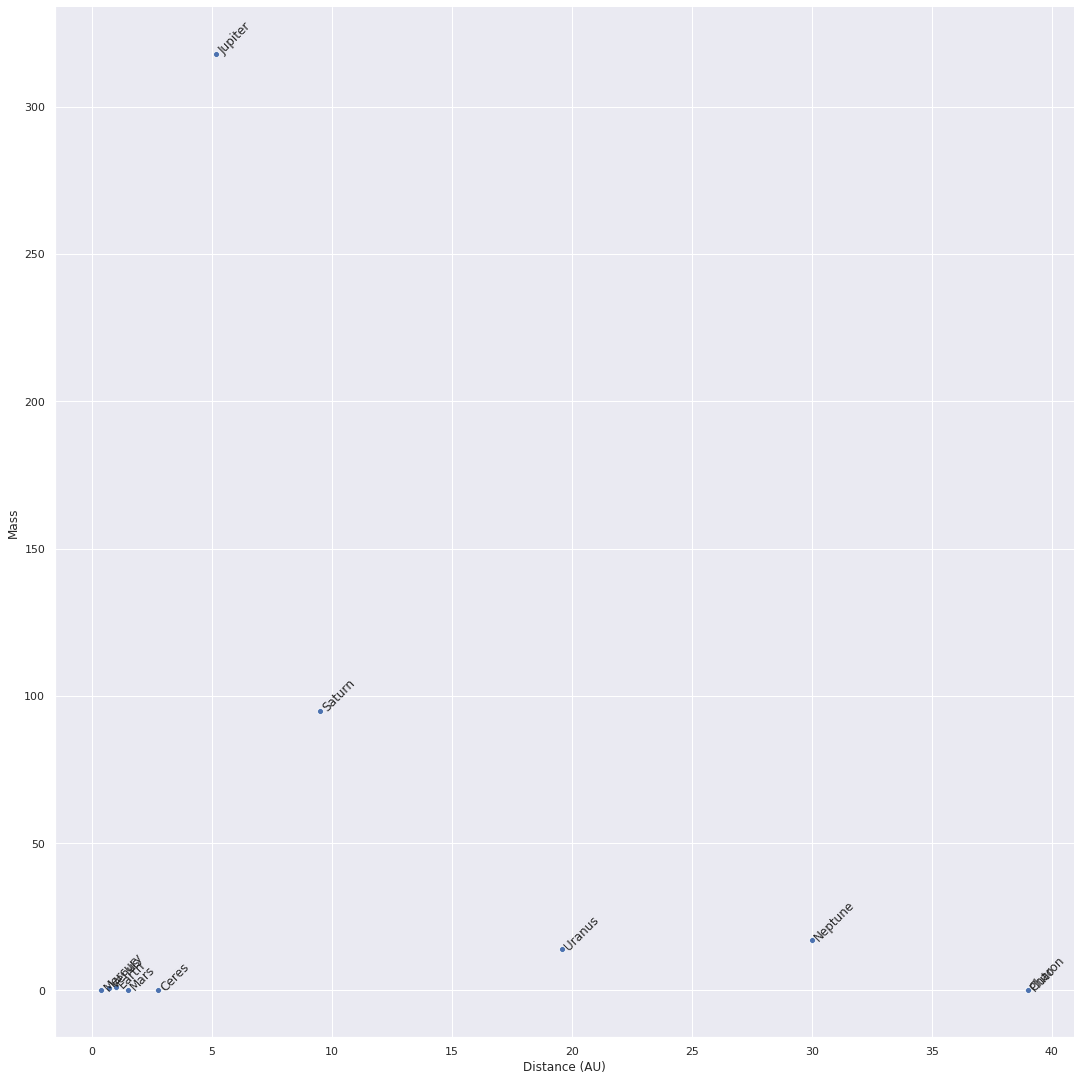

In [48]:
plot = sns.relplot(
    x = "Distance (AU)",
    y = "Mass",
    data = planets
)
plt.subplots_adjust(right=3, top=3)
for _, row in planets.iterrows():
    plt.text(row['Distance (AU)'], row['Mass'], str(row['Planet name']), rotation=45)


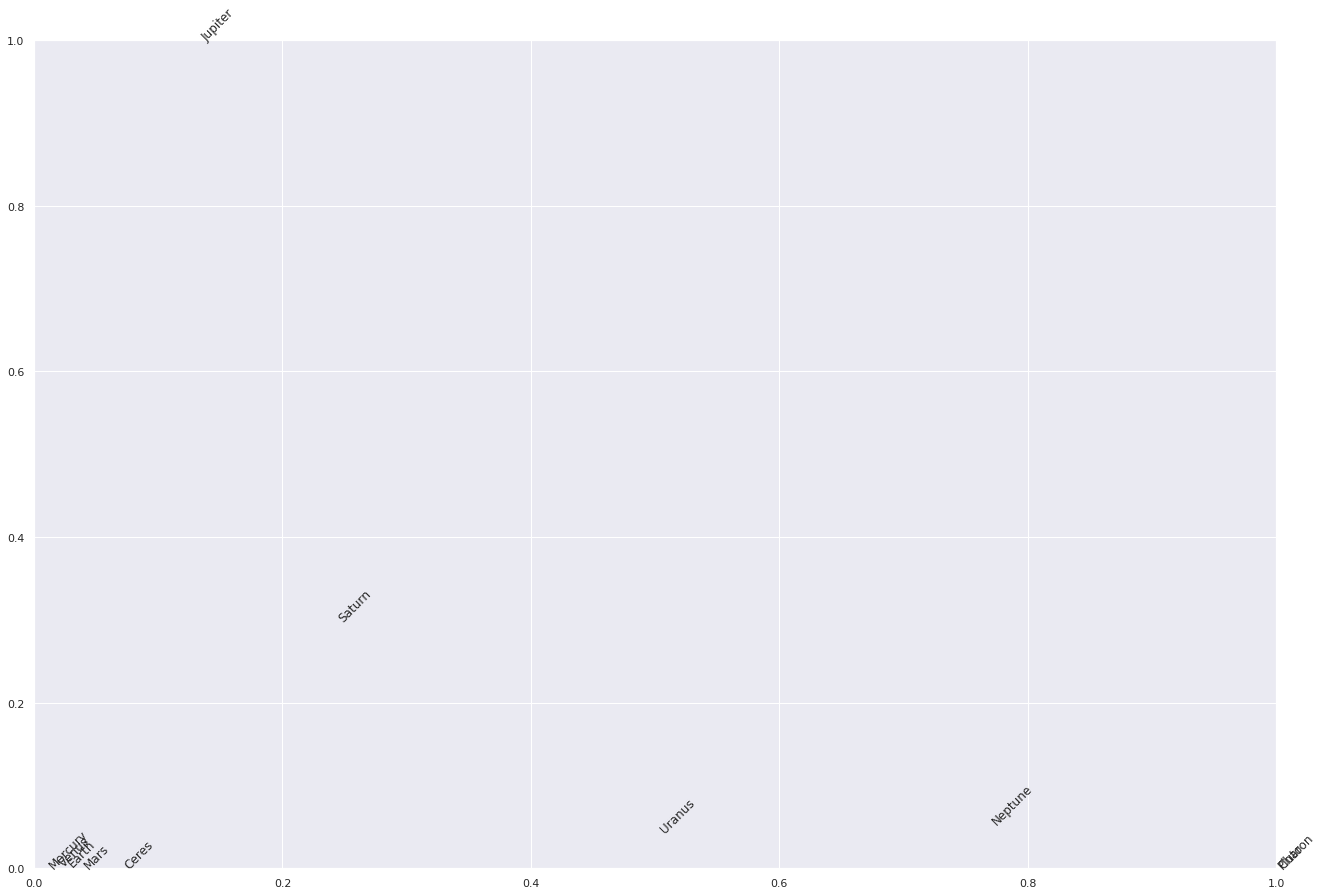

In [44]:
# Try another plot now with the names.
import matplotlib.pyplot as plt
def label_point(x, y, val, df):
    ax = plt.gca()
    maxcol = {}
    max_x, max_y = df[[x, y]].max()
    for name in [x, y]:
        maxcol[name] = max(df[name])
    #ax.set_xlim([0, 2])
    #ax.set_xlim([0, max])
    for i, row in planets.iterrows():
        #ax.text(row[x], row[y], str(row[val]), rotation=45)
        #ax.text(row[x]/max_x, row[y]/max_y, str(row[val]), rotation=45)
        ax.text(row[x]/maxcol[x], row[y]/maxcol[y], str(row[val]), rotation=45)
label_point('Distance (AU)', 'Mass', 'Planet name', planets)
plt.subplots_adjust(right=3, top=3)

In [25]:
center = 'Earth'
this = planets[ planets['Planet name'] == center ]
mass = this.iloc[0]['Mass']
dist = this.iloc[0]['Distance (AU)']

In [26]:
this

,Planet name,Distance (AU),Mass
2,Earth,1.0,1.0


In [27]:
mass

1.0

In [28]:
dist

1.0

In [29]:
# gravitational force is F = G * (mass1*mass2) / D**2
# https://en.wikipedia.org/wiki/Gravity#Newton's_theory_of_gravitation
# https://en.wikipedia.org/wiki/Gravitational_constant
G = 6
distances = abs(dist - planets['Distance (AU)'])
distances

0      0.60
1      0.30
2      0.00
3      0.50
4      1.77
5      4.20
6      8.50
7     18.60
8     29.00
9     38.00
10    38.00
Name: Distance (AU), dtype: float64

In [30]:
# We create a new Data Frame
forces = planets.copy()
del(forces['Mass'])
del(forces['Distance (AU)'])
forces

,Planet name
0,Mercury
1,Venus
2,Earth
3,Mars
4,Ceres
5,Jupiter
6,Saturn
7,Uranus
8,Neptune
9,Pluto


In [31]:
G * (planets.Mass * mass) / distances**2
forces['F'] = G * (planets.Mass * mass) / distances**2
forces


,Planet name,F
0,Mercury,0.916667
1,Venus,54.333333
2,Earth,inf
3,Mars,2.568000
4,Ceres,0.000287
5,Jupiter,108.163265
6,Saturn,7.889273
7,Uranus,0.242803
8,Neptune,0.121284
9,Pluto,0.000009
